In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:xlabel='Height', ylabel='Gender'>

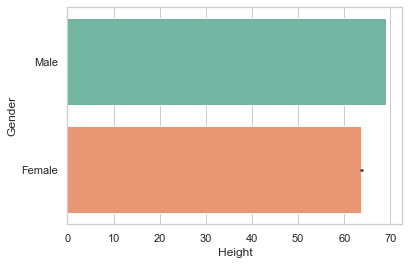

In [2]:
sns.set(style="whitegrid")
sns.barplot(x="Height", y="Gender", data=df,palette="Set2")

<AxesSubplot:xlabel='Weight', ylabel='Gender'>

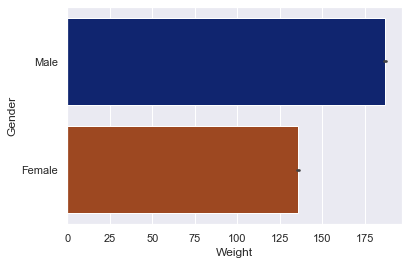

In [3]:
sns.set(style="darkgrid")
sns.barplot(x="Weight", y="Gender", data=df, palette="dark")

<AxesSubplot:xlabel='Height', ylabel='Weight'>

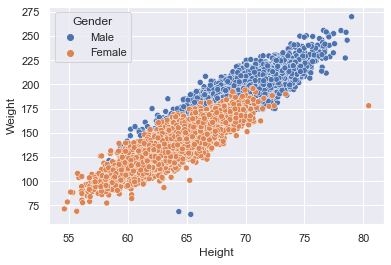

In [4]:
sns.scatterplot(
    data=df, x="Height", y="Weight", hue="Gender",
    sizes=(20, 200), legend="full"
)

# LabelEncoder


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])

In [7]:
y=df['Weight'] #Target

In [8]:
x=df.drop('Weight', axis=1)
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.3, random_state=35) 

# Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
lr =  LinearRegression()
lr.fit(x,y)

LinearRegression()

In [12]:
coeficiente= lr.coef_

In [13]:
intercept= lr.intercept_

In [14]:
yprediction = lr.predict(xtest)

In [15]:
xtest_sample=[[1, 73.847017], [1, 68.781904], [1, 74.110105], [1, 71.730978],[1,69.881796], [0, 61.79309615],
[0, 65.96801895], [0, 62.85037864]]

ypred_sample=lr.predict(xtest_sample)

# Accuracy test


In [16]:
lr.score(xtest , ytest)

0.901369510158057

In [17]:
lr.score(xtrain , ytrain)

0.8993536366525013

In [18]:
from sklearn.metrics import r2_score
r2_score(ytest,yprediction)

0.901369510158057

# MSE

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,yprediction)

101.36242566005457

# KNN Regression

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(x,y)

KNeighborsRegressor(n_neighbors=3)

In [23]:
yprediction = knr.predict(xtest)

In [24]:
knr.score(xtest , ytest)

0.9330279315098857

In [25]:
knr.score(xtrain , ytrain)

0.9319774326351506

In [26]:
from sklearn.metrics import r2_score
r2_score(ytest,yprediction)

0.9330279315098857

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,yprediction)

68.82710736312778

In [28]:
xtest_sample=[[1, 73.847017], [1, 68.781904], [1, 74.110105], [1, 71.730978],[1,69.881796], [0, 61.79309615],
[0, 65.96801895], [0, 62.85037864]]

ypred_sample=knr.predict(xtest_sample)
ypred_sample

array([226.17556923, 174.84175387, 223.1174292 , 207.4332181 ,
       191.25132687, 118.4676225 , 152.41137363, 121.38922953])

# RandomizedSearchCV

In [29]:
from sklearn.model_selection import RandomizedSearchCV
model_rs = KNeighborsRegressor(n_neighbors=3)
k_range=list(range(5, 100))
options=['uniform', 'distance']
param_grid=dict(n_neighbors=k_range, weights=options)

rand_search = RandomizedSearchCV(model_rs,param_grid)
rand_search.fit(xtrain, ytrain)

RandomizedSearchCV(estimator=KNeighborsRegressor(n_neighbors=3),
                   param_distributions={'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                                                        12, 13, 14, 15, 16, 17,
                                                        18, 19, 20, 21, 22, 23,
                                                        24, 25, 26, 27, 28, 29,
                                                        30, 31, 32, 33, 34, ...],
                                        'weights': ['uniform', 'distance']})

In [30]:
rand_search.best_score_

0.8943346590990171

In [31]:
rand_search.best_estimator_

KNeighborsRegressor(n_neighbors=76)

In [32]:
rand_search.best_params_

{'weights': 'uniform', 'n_neighbors': 76}

In [34]:
rand_search_new = rand_search.best_estimator_

In [35]:
rand_search_new.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=76)

In [36]:
yprediction = rand_search_new.predict(xtest)
yprediction

array([144.14919535, 119.29366362, 134.73601971, ..., 163.55253836,
       143.73369451, 168.27119804])

# Accuracy testing

In [37]:
rand_search_new.score(xtest , ytest)

0.8992424282621174

In [38]:
rand_search_new.score(xtrain , ytrain)

0.8984698202736052

In [39]:
from sklearn.metrics import r2_score
r2_score(ytest,yprediction)

0.8992424282621174

# MSE

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,yprediction)

103.54842494785626

In [41]:
xtest_sample=[[1, 73.847017], [1, 68.781904], [1, 74.110105], [1, 71.730978],[1,69.881796], [0, 61.79309615],
[0, 65.96801895], [0, 62.85037864]]

ypred_sample=rand_search_new.predict(xtest_sample)
ypred_sample

array([215.71678959, 184.54775027, 216.87888536, 202.727292  ,
       193.13623559, 123.0072914 , 149.54836404, 129.20807727])

# Compare with Old KNN model and Linear regression

In [42]:
lr = 'Accuracy of KNN Class'
knn_r = 'Accuracy of KNN'
knn_rs = 'Accuracy of KNN class using RandomizedSearchCV'
df1=pd.DataFrame([[lr,0.901369510158057],[knn_r, 0.9330279315098857], [knn_rs, 0.8995082493114503]],columns=['Accuracy', 'Value'])
df1

,Accuracy,Value
0,Accuracy of KNN Class,0.901370
1,Accuracy of KNN,0.933028
2,Accuracy of KNN class using RandomizedSearchCV,0.899508


<AxesSubplot:xlabel='Value', ylabel='Accuracy'>

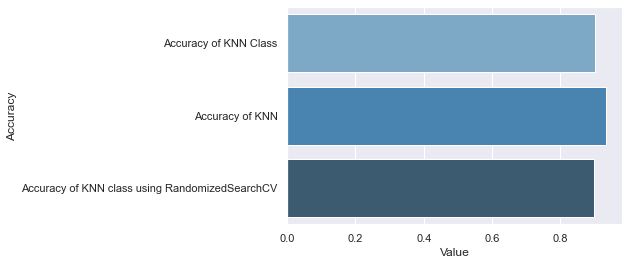

In [43]:
sns.barplot(x="Value", y="Accuracy", data=df1,
                 palette="Blues_d")

# KNN Classifier

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [46]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = le.fit_transform(df[column])

In [47]:
y=df['Gender']

In [48]:
x=df.copy()
x=df.drop('Gender', axis=1)

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y, train_size=0.70, random_state=45) #model train

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_cl = KNeighborsClassifier(n_neighbors=3)

In [51]:
knn_cl.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [52]:
ypred= knn_cl.predict(xtest)

In [53]:
print(ypred)

[1 1 1 ... 1 0 1]


In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, ypred)
cm

array([[ 967,  128],
       [ 125, 1347]], dtype=int64)

Text(30.5, 0.5, 'Actual Values')

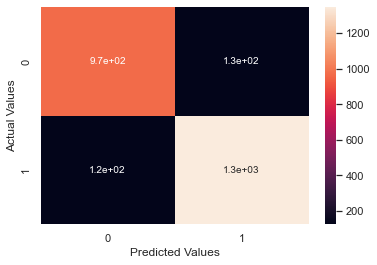

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# Confsion Matrix

In [56]:
tp, fn, fp, tn = confusion_matrix(ytest, ypred).reshape(-1)

In [57]:
accuracy = (tp+tn)/len(ytest)
accuracy

0.901441371250487

In [58]:
accuracy= (tp+tn)/(tp+fp+tn+fn)

In [59]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ytest, ypred)
accuracy

0.901441371250487

In [60]:
from sklearn.metrics import f1_score
f1_score(ytest, ypred, average=None)

array([0.88431642, 0.91414998])

# Classification Report

In [61]:
from sklearn.metrics import classification_report, plot_roc_curve, accuracy_score

In [62]:
classification_report(ytest, ypred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.88      0.88      1095\n           1       0.91      0.92      0.91      1472\n\n    accuracy                           0.90      2567\n   macro avg       0.90      0.90      0.90      2567\nweighted avg       0.90      0.90      0.90      2567\n'

In [63]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1095
           1       0.91      0.92      0.91      1472

    accuracy                           0.90      2567
   macro avg       0.90      0.90      0.90      2567
weighted avg       0.90      0.90      0.90      2567



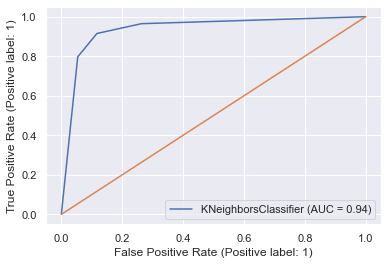

In [64]:
plot_roc_curve(knn_cl,xtest, ytest)
plt.plot([0,1],[0,1])

In [65]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
k_range=range(1,30)
scores=[]

for k in k_range:
    knn_cl=KNeighborsClassifier(n_neighbors=k)
    knn_cl.fit(xtrain, ytrain)
    ypred=knn_cl.predict(xtest)
    scores.append(metrics.accuracy_score(ytest, ypred))

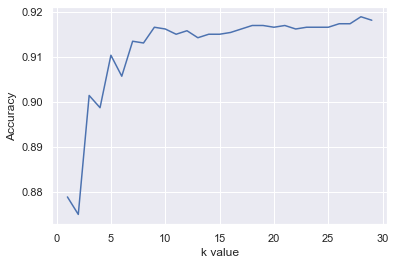

In [66]:
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()

# Tuning KNN Classifier

In [67]:
from sklearn.model_selection import RandomizedSearchCV
k_range=list(range(5, 100, 20))
options=['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=options)

In [68]:
record=KNeighborsClassifier()
rand = RandomizedSearchCV(record, param_grid, cv=15, scoring='accuracy', n_iter=15, random_state=45)
rand.fit(x, y)

RandomizedSearchCV(cv=15, estimator=KNeighborsClassifier(), n_iter=15,
                   param_distributions={'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                                                        12, 13, 14, 15, 16, 17,
                                                        18, 19, 20, 21, 22, 23,
                                                        24, 25, 26, 27, 28, 29,
                                                        30, 31, 32, 33, 34, ...],
                                        'weights': ['uniform', 'distance']},
                   random_state=45, scoring='accuracy')

In [69]:
rand.best_score_

0.9182925205600106

In [70]:
rand.best_params_

{'weights': 'distance', 'n_neighbors': 91}

In [71]:
rand.best_estimator_

KNeighborsClassifier(n_neighbors=91, weights='distance')

In [72]:
new_rand = rand.best_estimator_

In [73]:
new_rand.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=91, weights='distance')

In [74]:
ypred_rs= new_rand.predict(xtest)

In [75]:
ypred_rs

array([1, 1, 1, ..., 1, 0, 1])

In [76]:
new_rand.score(xtest, ytest)

0.9197506817296455

In [78]:
from sklearn.metrics import confusion_matrix
cm_rs=confusion_matrix(ytest, ypred_rs)

In [79]:
cm_rs

array([[ 994,  101],
       [ 105, 1367]], dtype=int64)

Text(30.5, 0.5, 'Actual Values')

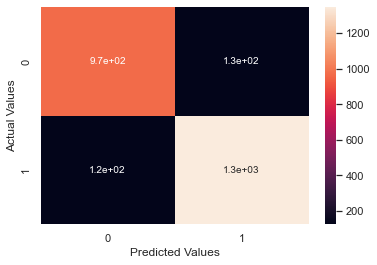

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# Confsion Matrix

In [81]:
tp, fn, fp, tn = confusion_matrix(ytest, ypred).reshape(-1)

# Accuracy

In [82]:
accuracy = (tp+tn)/len(ytest)
accuracy

0.9181924425399299

In [83]:
accuracy= (tp+tn)/(tp+fp+tn+fn)
accuracy


0.9181924425399299

In [84]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ytest, ypred_rs)
accuracy

0.9197506817296455

# F1 Score

In [85]:
from sklearn.metrics import f1_score
f1_score(ytest, ypred_rs, average=None)

array([0.90610757, 0.92993197])

# Classification Report

In [86]:
from sklearn.metrics import classification_report, plot_roc_curve, accuracy_score

In [87]:
classification_report(ytest, ypred_rs)

'              precision    recall  f1-score   support\n\n           0       0.90      0.91      0.91      1095\n           1       0.93      0.93      0.93      1472\n\n    accuracy                           0.92      2567\n   macro avg       0.92      0.92      0.92      2567\nweighted avg       0.92      0.92      0.92      2567\n'

In [88]:
print(classification_report(ytest, ypred_rs))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1095
           1       0.93      0.93      0.93      1472

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



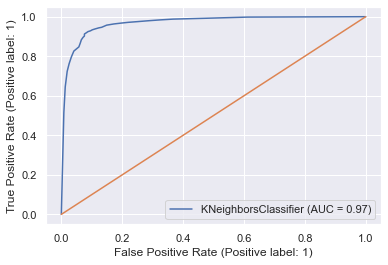

In [89]:
plot_roc_curve(knn_cl,xtest, ytest)
plt.plot([0,1],[0,1])

# Compare accuracy with default KNN and After tuning K value

In [90]:
ak = 'Accuracy of KNN Class'
rs = 'Accuracy of KNN class using RandomizedSearchCV'

df3=pd.DataFrame([[ak,0.901441371250487],[rs, 0.9181924425399299]],
                 columns=['Accuracy', 'Value'])
df3

,Accuracy,Value
0,Accuracy of KNN Class,0.901441
1,Accuracy of KNN class using RandomizedSearchCV,0.918192


# Accuracy Comparision

<AxesSubplot:xlabel='Value', ylabel='Accuracy'>

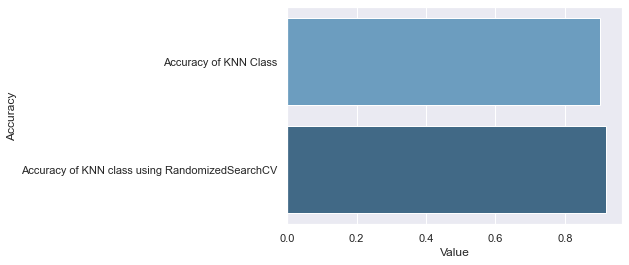

In [92]:
sns.set()
sns.barplot(x="Value", y="Accuracy", data=df3,
                 palette="Blues_d")